In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [182]:
data = pd.read_csv("HR Employee Attrition.csv")

In [183]:
data.shape 

(1470, 36)

In [184]:
data.head()

,ID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [185]:
data.columns

Index(['ID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

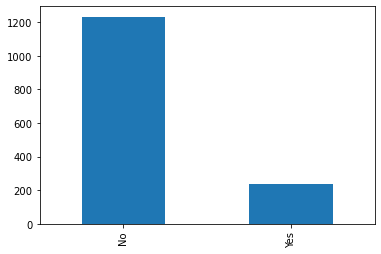

In [273]:
data['Attrition'].value_counts().plot(kind = 'bar')

> Imbalanced data

### Preprocessing

In [186]:
non_impactful_features = ['Gender','Education','PerformanceRating','DailyRate','DistanceFromHome','HourlyRate','MonthlyRate']
data.drop(non_impactful_features,axis = 1,inplace = True)

In [187]:
# Remove low variance and redundent variables
data.drop(['ID','EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis = 1,inplace = True)

In [188]:
# From EDA we have got some high Association. So we remove the associated vars
deleted_cols = ['JobLevel','YearsAtCompany','JobRole']
data.drop(deleted_cols,axis = 1,inplace = True)

In [189]:
data.shape

(1470, 21)

In [190]:
independent_columns = list(data.columns)
independent_columns.remove("Attrition")

X = data[independent_columns]
y = data["Attrition"]
X.shape

(1470, 20)

### Feature Transformation

In [191]:
categorical_vars = X.select_dtypes("O").columns.tolist()
categorical_vars

['BusinessTravel', 'Department', 'EducationField', 'MaritalStatus', 'OverTime']

In [192]:
numeric_vars = [var for var in X.columns if var not in categorical_vars]
thresold = 15
discrete_vars = [var for var in numeric_vars if len(X[var].unique())<=thresold]
continuous_vars = [var for var in numeric_vars if var not in discrete_vars]

In [193]:
continuous_vars

['Age',
 'MonthlyIncome',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

#### Continuous Vars Treatment

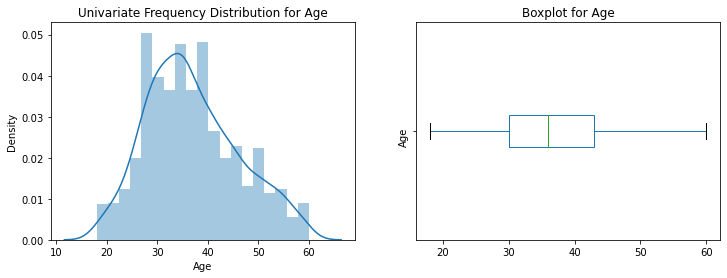

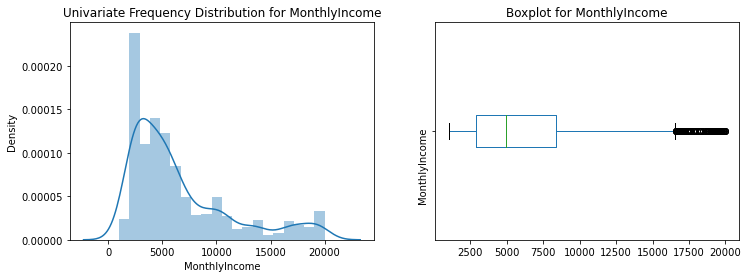

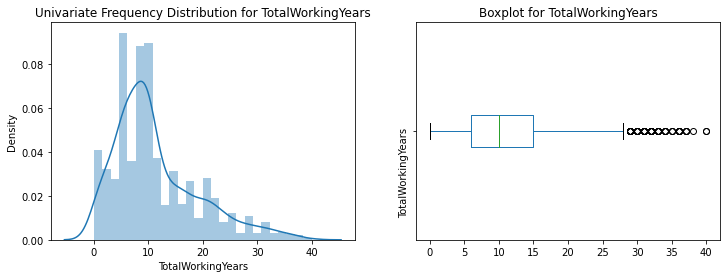

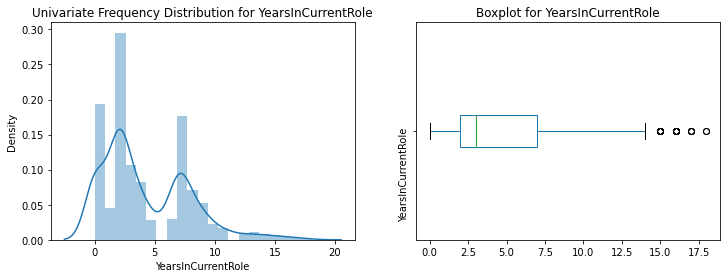

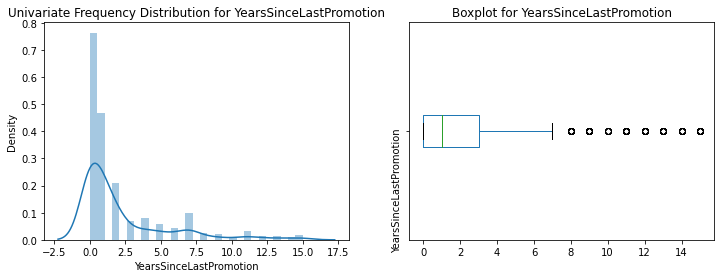

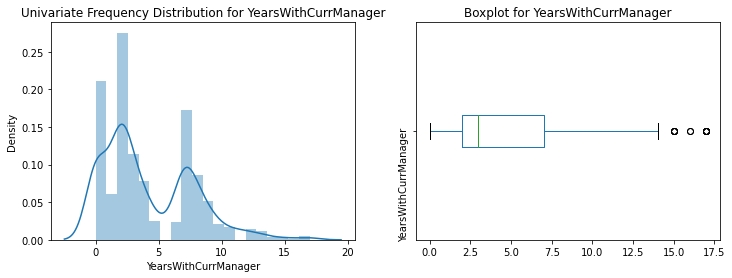

In [194]:
for var in continuous_vars:
    fig = plt.figure(figsize = (12,4))
    ax = fig.add_subplot(1,2,1)
    sns.distplot(X[var],ax = ax)
    plt.title(f"Univariate Frequency Distribution for {var}")
    ax = fig.add_subplot(1,2,2)
    X[var].plot(kind = 'box',vert = False)
    plt.yticks(rotation=90) 
    plt.title(f"Boxplot for {var}")
    plt.show()

In [195]:
positively_skewed_vars = ['MonthlyIncome',
                         'TotalWorkingYears',
                         'YearsInCurrentRole',
                         'YearsSinceLastPromotion',
                         'YearsWithCurrManager']

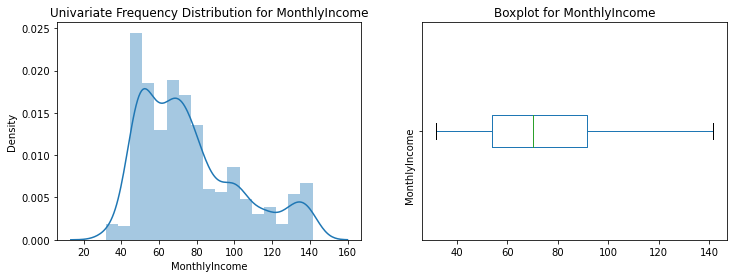

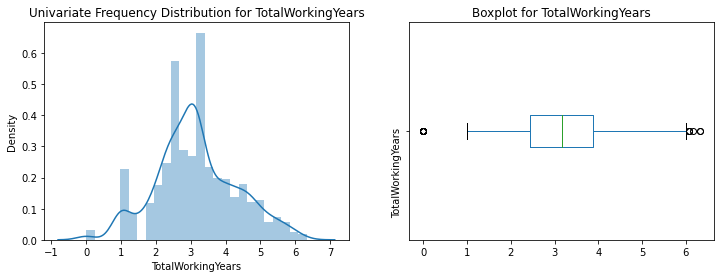

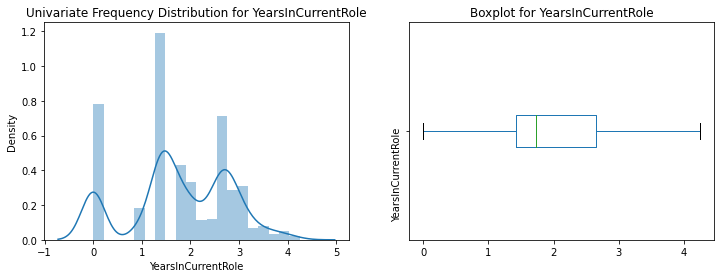

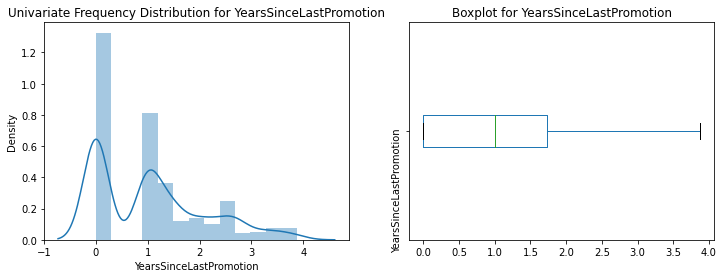

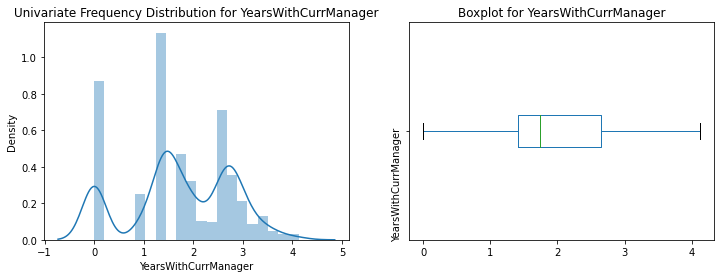

In [196]:
for var in positively_skewed_vars:
    fig = plt.figure(figsize = (12,4))
    ax = fig.add_subplot(1,2,1)
    sns.distplot(np.sqrt(X[var]),ax = ax)
    plt.title(f"Univariate Frequency Distribution for {var}")
    ax = fig.add_subplot(1,2,2)
    np.sqrt(X[var]).plot(kind = 'box',vert = False)
    plt.yticks(rotation=90) 
    plt.title(f"Boxplot for {var}")
    plt.show()

Now We have normal data for each skewed variable and outliers are also very less.

In [197]:
# Sqrt transformations
for var in positively_skewed_vars:
    X[var] = np.sqrt(X[var])

In [198]:
X.head()

,Age,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,Sales,Life Sciences,2,3,4,Single,77.414469,8,Yes,11,1,0,2.828427,0,1,2.000000,0.000000,2.236068
1,49,Travel_Frequently,Research & Development,Life Sciences,3,2,2,Married,71.624018,1,No,23,4,1,3.162278,3,3,2.645751,1.000000,2.645751
2,37,Travel_Rarely,Research & Development,Other,4,2,3,Single,45.716518,6,Yes,15,2,0,2.645751,3,3,0.000000,0.000000,0.000000
3,33,Travel_Frequently,Research & Development,Life Sciences,4,3,3,Married,53.935146,1,Yes,11,3,0,2.828427,3,3,2.645751,1.732051,0.000000
4,27,Travel_Rarely,Research & Development,Medical,1,3,2,Married,58.889727,9,No,12,4,1,2.449490,3,3,1.414214,1.414214,1.414214


#### Feature Scaling for numeric vars

In [199]:
from sklearn.preprocessing import StandardScaler

In [200]:
scaler=StandardScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(X[numeric_vars]),columns = X[numeric_vars].columns)
scaled_df.head()

,Age,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,-0.660531,0.379672,1.153254,0.047548,2.125136,-1.150554,-1.584178,-0.932014,-0.278944,-2.171982,-2.493820,0.215904,-0.989370,0.474052
1,1.322365,0.254625,-1.026167,-0.660853,-0.170746,-0.678049,2.129306,1.191438,0.241988,0.008926,0.155707,0.338096,0.838925,-0.038311,0.865142
2,0.008343,1.169781,-1.026167,0.246200,-1.147435,1.324226,-0.057267,-0.658973,-0.932014,-0.436461,0.155707,0.338096,-1.713695,-0.989370,-1.660530
3,-0.429664,1.169781,0.379672,0.246200,-0.837600,-0.678049,-1.150554,0.266233,-0.932014,-0.278944,0.155707,0.338096,0.838925,0.657912,-1.660530
4,-1.086676,-1.575686,0.379672,-0.660853,-0.650817,2.525591,-0.877232,1.191438,0.241988,-0.605693,0.155707,0.338096,-0.349262,0.355631,-0.310501


#### Categorical Vars Encoding

In [201]:
dummies = pd.get_dummies(X[categorical_vars],drop_first=True)
dummies.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,1,1
1,1,0,1,0,1,0,0,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,0,1,1
3,1,0,1,0,1,0,0,0,0,1,0,1
4,0,1,1,0,0,0,1,0,0,1,0,0


In [202]:
X = pd.concat([dummies,scaled_df],axis = 1)
X.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Married,...,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,1,0,0,0,0,0,...,2.125136,-1.150554,-1.584178,-0.932014,-0.278944,-2.171982,-2.493820,0.215904,-0.989370,0.474052
1,1,0,1,0,1,0,0,0,0,1,...,-0.678049,2.129306,1.191438,0.241988,0.008926,0.155707,0.338096,0.838925,-0.038311,0.865142
2,0,1,1,0,0,0,0,1,0,0,...,1.324226,-0.057267,-0.658973,-0.932014,-0.436461,0.155707,0.338096,-1.713695,-0.989370,-1.660530
3,1,0,1,0,1,0,0,0,0,1,...,-0.678049,-1.150554,0.266233,-0.932014,-0.278944,0.155707,0.338096,0.838925,0.657912,-1.660530
4,0,1,1,0,0,0,1,0,0,1,...,2.525591,-0.877232,1.191438,0.241988,-0.605693,0.155707,0.338096,-0.349262,0.355631,-0.310501


In [203]:
X.shape

(1470, 27)

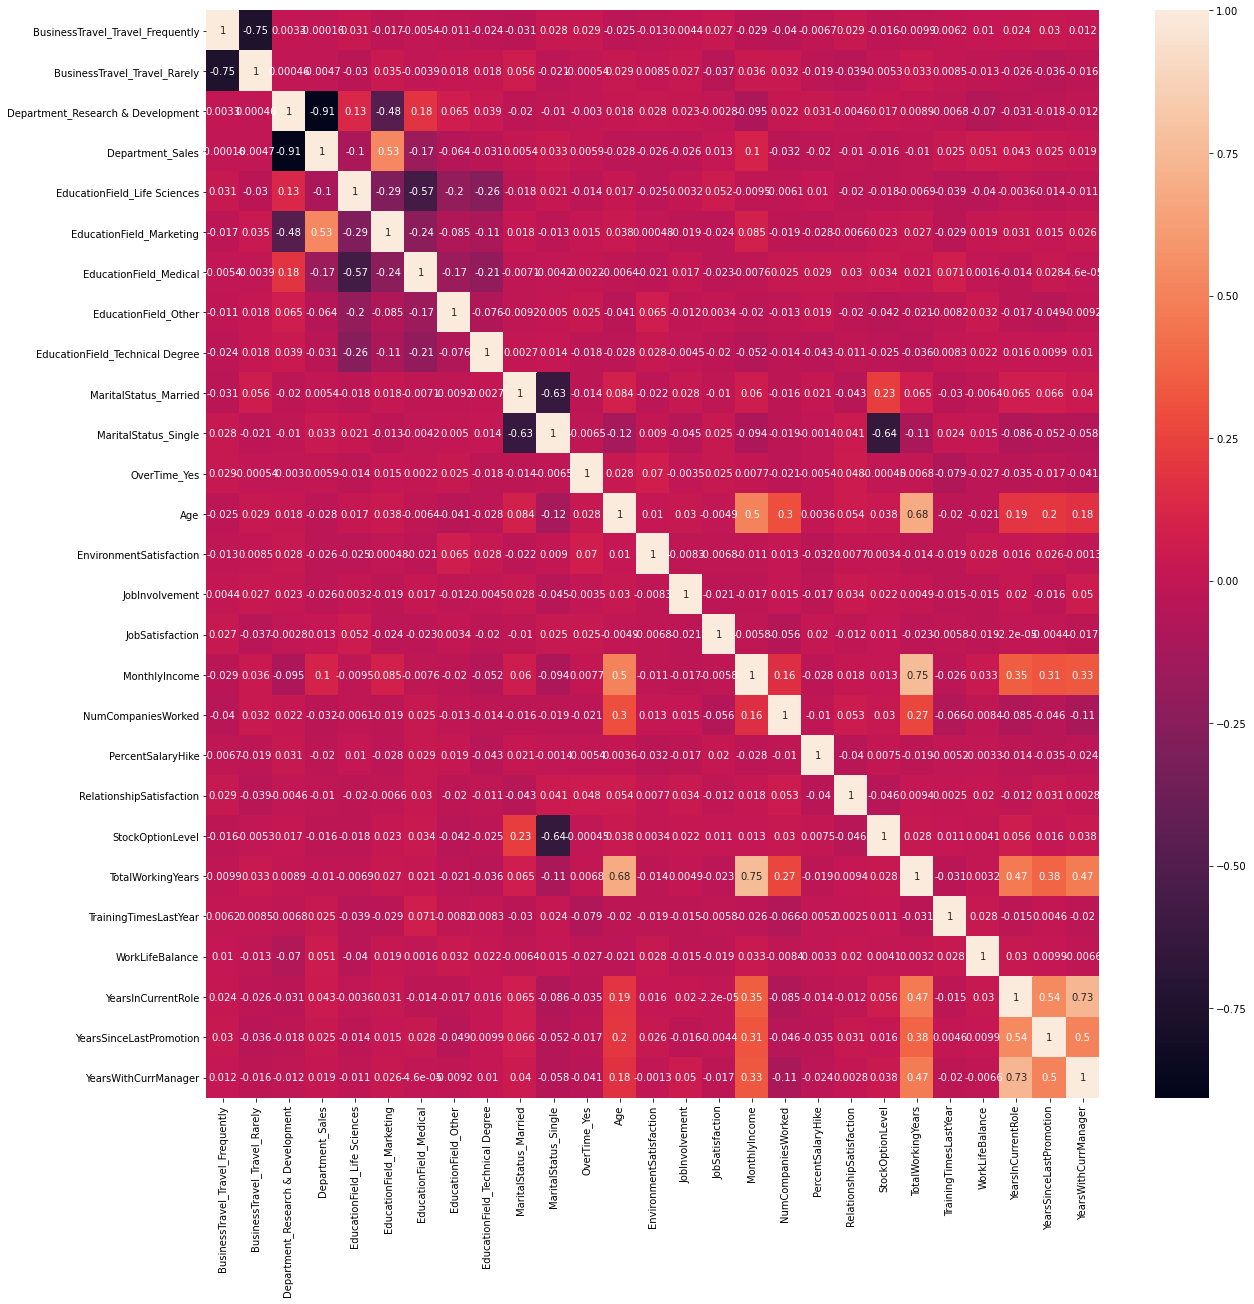

In [204]:
fig = plt.figure(figsize = (20,20))
sns.heatmap(X.corr(),annot = True)

- Department_Sales and Department_Research & Development are highly negetively correlated.

In [205]:
X.drop(['Department_Sales'],axis = 1,inplace = True)

So no high coorelation exits in data.

In [206]:
X.shape

(1470, 26)

### Splitting the data into training and validation sets

In [207]:
y = y.map({'Yes' : 1,"No" : 0})
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

### Modelling

#### Handling the Imbalanced dataset

##### 1. By Weight Adjusting

In [208]:
from sklearn.linear_model import LogisticRegression
log_cls = LogisticRegression(class_weight = 'balanced')

In [209]:
log_cls.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [234]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve,precision_score,recall_score
def visualization(model,testX,testy,model_name,var):
    print(f"------------------{var}------------------\n")
    prediction = model.predict(testX)
    print(f'Accuracy Score for {var} --- {accuracy_score(testy,prediction)}\n')
    print(f'Confusion Matrix for {var} --- \n{confusion_matrix(testy,prediction)}\n')
    if var == 'Testing':
        ns_probs = [0 for _ in range(len(testy))]
        lr_probs = model.predict_proba(testX)
        # keep probabilities for the positive outcome only
        lr_probs = lr_probs[:, 1]
        # calculate scores
        ns_auc = roc_auc_score(testy, ns_probs)
        lr_auc = roc_auc_score(testy, lr_probs)
        # summarize scores
        print('No Skill: ROC AUC=%.3f' % (ns_auc))
        print(f'{model_name}: ROC AUC=%.3f' % (lr_auc))
        # calculate roc curves
        ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
        lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
        # plot the roc curve for the model
        plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
        plt.plot(lr_fpr, lr_tpr, marker='.', label= model_name)
        # axis labels
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        # show the legend
        plt.legend()
        # show the plot
        plt.show()

In [211]:
visualization(log_cls,X_train,y_train,'Logistic','Training')

------------------Training------------------

Accuracy Score for Training --- 0.7997967479674797

Confusion Matrix for Training --- 
[[653 164]
 [ 33 134]]



------------------Testing------------------

Accuracy Score for Testing --- 0.779835390946502

Confusion Matrix for Testing --- 
[[331  85]
 [ 22  48]]

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.806


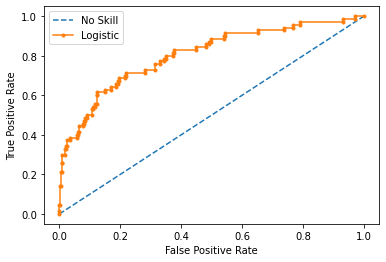

In [212]:
visualization(log_cls,X_test,y_test,'Logistic','Testing')

In [213]:
y_pred = log_cls.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86       416
           1       0.36      0.69      0.47        70

    accuracy                           0.78       486
   macro avg       0.65      0.74      0.67       486
weighted avg       0.85      0.78      0.80       486



##### Hyper Parameter tuning

In [214]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 102,110,90,80,120,130]
class_weight = ['balanced','none',{1: .8,0 : .2},{1: .7,0 : .3}]
# define grid search
params = dict(solver=solvers,C=c_values,class_weight = class_weight)

In [215]:
from sklearn.model_selection import GridSearchCV

In [216]:
gsearch = GridSearchCV(log_cls,param_grid = params,n_jobs=-1, cv = 10)
gsearch.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [100, 102, 110, 90, 80, 120, 130],
                         'class_weight': ['balanced', 'none', {0: 0.2, 1: 0.8},
                                          {0: 0.3, 1: 0.7}],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [217]:
log_cls_best = gsearch.best_estimator_
log_cls_best

LogisticRegression(C=100, class_weight='none', solver='newton-cg')

In [218]:
log_cls_best.fit(X_train,y_train)

LogisticRegression(C=100, class_weight='none', solver='newton-cg')

In [219]:
visualization(log_cls_best,X_train,y_train,'Logistic','Training')

------------------Training------------------

Accuracy Score for Training --- 0.8780487804878049

Confusion Matrix for Training --- 
[[788  29]
 [ 91  76]]



------------------Testing------------------

Accuracy Score for Testing --- 0.8909465020576132

Confusion Matrix for Testing --- 
[[406  10]
 [ 43  27]]

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.813


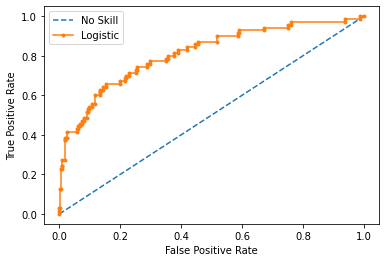

In [220]:
visualization(log_cls_best,X_test,y_test,'Logistic','Testing')

##### 2. By Smote oversampling


In [221]:
from imblearn.over_sampling import SMOTE

oversampler=SMOTE(random_state=42)
X_train_smote,  y_train_smote = oversampler.fit_sample(X_train,y_train)

In [222]:
log_cls_smote = LogisticRegression()

In [223]:
log_cls_smote.fit(X_train_smote,  y_train_smote)

LogisticRegression()

In [224]:
visualization(log_cls_smote,X_train_smote,  y_train_smote,'Logistic','Training')

------------------Training------------------

Accuracy Score for Training --- 0.8567931456548348

Confusion Matrix for Training --- 
[[723  94]
 [140 677]]



------------------Testing------------------

Accuracy Score for Testing --- 0.8374485596707819

Confusion Matrix for Testing --- 
[[369  47]
 [ 32  38]]

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.775


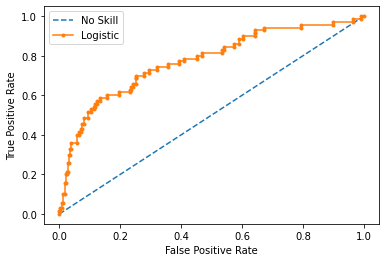

In [225]:
visualization(log_cls_smote,X_test,y_test,'Logistic','Testing')

In [244]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 102,110,90,80,120,130]
class_weight = ['balanced','none',{1: .8,0 : .2},{1: .7,0 : .3}]
# define grid search
params = dict(solver=solvers,C=c_values,class_weight = class_weight)

In [245]:
gsearch_smote = GridSearchCV(log_cls_smote,param_grid = params,n_jobs=-1, cv = 10)
gsearch_smote.fit(X_train_smote,  y_train_smote)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 102, 110, 90, 80, 120, 130],
                         'class_weight': ['balanced', 'none', {0: 0.2, 1: 0.8},
                                          {0: 0.3, 1: 0.7}],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [246]:
log_cls_smote_best = gsearch_smote.best_estimator_
log_cls_smote_best

LogisticRegression(C=100, class_weight='balanced', solver='newton-cg')

In [247]:
log_cls_smote_best.fit(X_train_smote,  y_train_smote)

LogisticRegression(C=100, class_weight='balanced', solver='newton-cg')

In [248]:
visualization(log_cls_smote_best,X_train_smote,  y_train_smote,'Logistic','Training')

------------------Training------------------

Accuracy Score for Training --- 0.8665850673194615

Confusion Matrix for Training --- 
[[731  86]
 [132 685]]



------------------Testing------------------

Accuracy Score for Testing --- 0.8415637860082305

Confusion Matrix for Testing --- 
[[371  45]
 [ 32  38]]

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.779


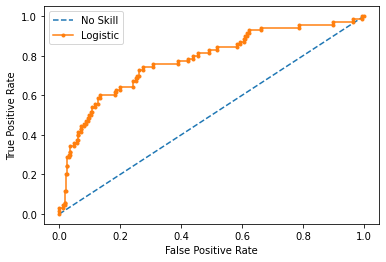

In [249]:
visualization(log_cls_smote_best,X_test,y_test,'Logistic','Testing')

### Feature Importance

In [268]:
from sklearn.ensemble import ExtraTreesClassifier
ex_cls = ExtraTreesClassifier()
ex_cls.fit(X_train,y_train)
ex_cls.feature_importances_

array([0.02575481, 0.0184484 , 0.02790469, 0.01984944, 0.01532547,
       0.02339093, 0.00982386, 0.01736143, 0.01751732, 0.03811167,
       0.07691033, 0.05430482, 0.0467516 , 0.04332038, 0.0449994 ,
       0.05959162, 0.04898832, 0.04425786, 0.04357442, 0.0376715 ,
       0.05827815, 0.04052306, 0.03997647, 0.05358763, 0.0389137 ,
       0.05486274])

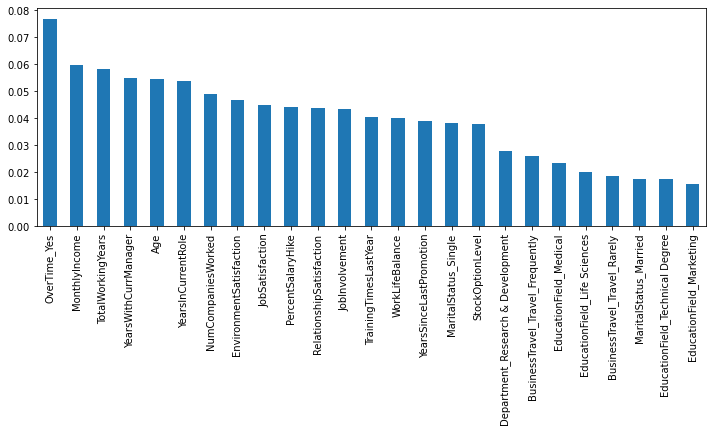

In [269]:
ranked_features=pd.Series(ex_cls.feature_importances_,index=X_train.columns)
fig = plt.figure(figsize = (12,4))
ranked_features.nlargest(25).plot(kind='bar')
plt.show()

### Final model

In [271]:
import pickle
pickle.dump(scaled_df, open('stanscalar.pkl','wb'))
pickle.dump(log_cls_best, open('model.pkl','wb'))